IMPORTING TENSORFLOW VERSION

In [ ]:
!pip install tensorflow-gpu==2.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf 
print(tf.__version__)

2.2.2


IMPORTING THE REQUIRED LIBRARIES

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools
warnings.filterwarnings("ignore")
SEED = 42   # set random seed

USING LENET CONVOLUTIONAL NETWORK

In [ ]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth) # (h, h, chanel)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(100, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model


ASSIGNING CLASSES AND DATASET WHERE THE TRAINING FILES ARE STORED

In [ ]:
## config
CLASSES = ["Boots", "Sandals", "Slippers"]
DATASET = "train"  # this folde must contain three subfolder with images
MODEL = "footwear.model" # name to store the model on disk
PLOT = "plot.png" # plot name

ASSIGNING EPOCH ,LEARNING RATE AND BATCH SIZE.

In [ ]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32

MOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


GIVING THE PATH

In [ ]:
import os
os.chdir("/content/drive/MyDrive/CNN EXAM/CNN/Shoe Classification")

In [ ]:
!dir

flagged  test  train


RESIZING IMAGE INTO A SINGLE DIMENSION AND CONVERTING IT INTO ARRAY.ALSO LABELLING THE CATEGORIES

In [ ]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(DATASET)))
random.seed(42)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (28, 28))
        image = img_to_array(image)
        data.append(image)

        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]

        if label == "Boots":
            label = 0
        elif label == "Sandals":
            label = 1
        elif label == "Slippers":
            label = 2

        # print("pr: ", label)	

        labels.append(label)
        
        # update the progressbar
        pbar.update(1)

[INFO] loading images...


  0%|          | 0/778 [00:00<?, ?it/s]

CHECKING THE SHAPE

In [ ]:
data[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 13.,  20.,  29.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [186., 178., 180.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [ 20.,  23.,  24.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [122., 127., 129.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [253., 2

In [ ]:
data[0].shape

(28, 28, 3)

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
labels

array([1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0,
       2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1,
       2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2,
       0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1,
       2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2,
       1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2,

SPLITTING THE DATA INTO TEST AND TRAIN. HERE TEST MEANS THE VALIDATION.

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [ ]:
trainX.shape

(583, 28, 28, 3)

In [ ]:
trainY.shape

(583,)

In [ ]:
trainY = to_categorical(trainY, num_classes=3)
testY = to_categorical(testY, num_classes=3)

**DATA AUGUMENTATION** (TO INCREASE THE NUMBER IMAGE BY SIMPLY CHANGING THE ORIENTATION SO THE MODEL COULD GET MORE DATA TO LEARN)

In [ ]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, 
                         width_shift_range=0.1, 
                         height_shift_range=0.1, 
                         shear_range=0.2, 
                         zoom_range=0.2, 
                         horizontal_flip=True, 
                         fill_mode="nearest")

INITILIZING THE MODEL

In [ ]:

print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=3)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("[INFO] model complied...")
EPOCHS = 50
INIT_LR = 1e-3
BS = 32

[INFO] compiling model...
[INFO] model complied...


In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 20)        1520      
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 100)        

In [ ]:
# train the network
print("[INFO] training network...")
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY), 
              steps_per_epoch=len(trainX) // BS,
              epochs=50, 
              verbose=1)

[INFO] training network...
Epoch 1/50
18/18 [==============================] - 2s 134ms/step - loss: 1.0504 - accuracy: 0.4356 - val_loss: 0.9474 - val_accuracy: 0.6564
Epoch 2/50
18/18 [==============================] - 2s 108ms/step - loss: 0.8511 - accuracy: 0.6116 - val_loss: 0.5539 - val_accuracy: 0.7897
Epoch 3/50
18/18 [==============================] - 2s 106ms/step - loss: 0.6995 - accuracy: 0.6479 - val_loss: 0.6867 - val_accuracy: 0.5641
Epoch 4/50
18/18 [==============================] - 2s 103ms/step - loss: 0.6213 - accuracy: 0.7223 - val_loss: 0.4240 - val_accuracy: 0.8103
Epoch 5/50
18/18 [==============================] - 2s 107ms/step - loss: 0.5714 - accuracy: 0.7368 - val_loss: 0.4053 - val_accuracy: 0.8462
Epoch 6/50
18/18 [==============================] - 2s 106ms/step - loss: 0.5364 - accuracy: 0.7514 - val_loss: 0.3604 - val_accuracy: 0.8410
Epoch 7/50
18/18 [==============================] - 2s 104ms/step - loss: 0.5383 - accuracy: 0.7459 - val_loss: 0.4258 - 

# **Plot the training and validation accuracy**

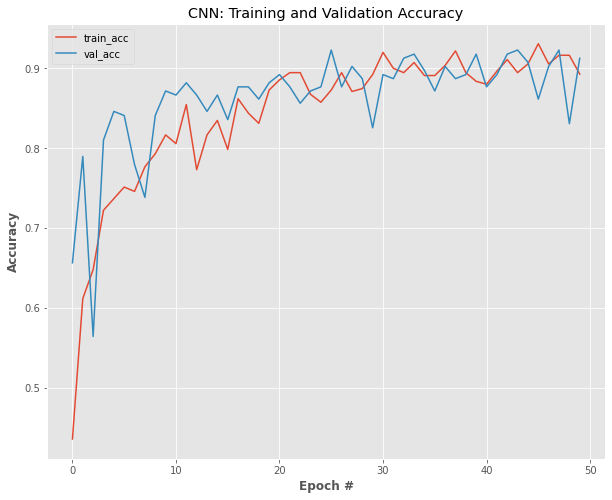

In [ ]:
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

THE VALIDATION AND TRAINING ACCURACY IS QUITE THE SAME.

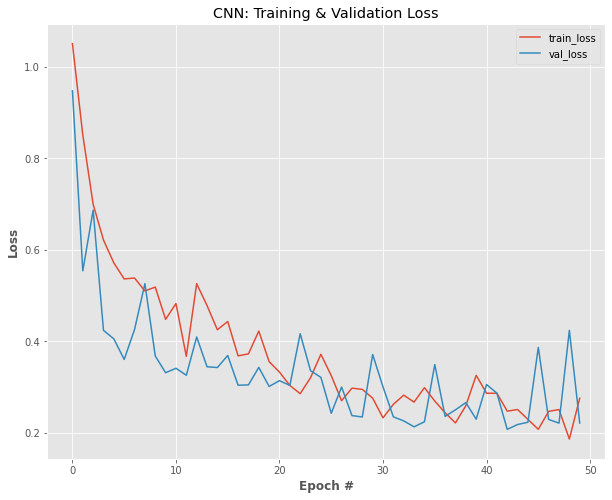

In [ ]:
# plot the training and validation loss
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

THE TRAINING LOSS AND VALIDATION LOSS IS QUITE EQUAL ACCORDING TO PLOT. SO WE HAVE GOOD MODEL.SO WE CAN PROCEED FURTHER.

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [ ]:
# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2


In [ ]:

# # load the model 
print("[INFO] loading network and...")
# model = load_model(MODEL)



[INFO] loading network and...


*AFTER VALIDATIION MOVING TOWARDS TESTING. SO SAVING THE IMAGE PATH AND RANDOMLY SHUFFLING THEM.* 

In [ ]:
testImagePaths = sorted(list(paths.list_images('test')))   # data folder with 3 categorical folders

all_class = ["Boots", "Sandals", "Slippers"]


FIRST CONVERTING THE INPUT TESTING IMAGE TO SAME SHAPE AND THEN PASSING IT TO MODEL PREDICTION

In [ ]:

with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        
        # load the image
        image = cv2.imread(imagePath)
        orig = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (28, 28))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        # classify the input image
        prd_conf = model.predict(image)[0]

        # build the label
        label = all_class[np.argmax(prd_conf)]
        proba = prd_conf[np.argmax(prd_conf)]

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)
        
        # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)
        
        pbar.update(1)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr

In [ ]:
def predict_image(image):
    # load the image
    
    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

        
    preds = model.predict(image)[0]
    result = dict()
    result["Boots"] = round(float(list(preds)[0]), 3)
    result["Sandals"] = round(float(list(preds)[1]), 3)
    result["Slippers"] = round(float(list(preds)[2]), 3)
    
    print(result)
    
    return result

In [ ]:
im = gr.inputs.Image(shape=(28,28))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=predict_image, inputs=im, outputs=label, capture_session=True, title="CNN Demo").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://21018c28-1360-4740.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
